In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

In [3]:
df = pd.read_csv(F"/content/gdrive/MyDrive/distance.csv")

In [4]:
vehicle_capacity = [25, 30]

In [5]:
df

Customer  Latitude  Longtitude  Demand
0          0    4.4184    114.0932       0
1          1    4.3555    113.9777       5
2          2    4.3976    114.0049       8
3          3    4.3163    114.0764       3
4          4    4.3184    113.9932       6
5          5    4.4024    113.9896       5
6          6    4.4142    114.0127       8
7          7    4.4804    114.0734       3
8          8    4.3818    114.2034       6
9          9    4.4935    114.1828       5
10        10    4.4932    114.1322       8

In [6]:
coordinates = df[['Longtitude', 'Latitude']].values
customer = df['Customer'].values
demands = df['Demand'].values

In [7]:
## Calculate the distance matrix between eaach point

distance_matrix = np.empty((0,11), float)
for i in range(len(df)):
    Latitude2 = df['Latitude'][i]
    Longitude2 = df['Longtitude'][i]
    arr1 = np.empty(0,float)

    for j in range(len(df)):

      Latitude1 = df['Latitude'][j]
      Longitude1 = df['Longtitude'][j]
      distance = 100 * math.sqrt((Longitude2-Longitude1)**2 + (Latitude2-Latitude1)**2)
      arr1 = np.append(arr1, [distance], axis=0)
    distance_matrix = np.append(distance_matrix,[arr1], axis=0)




In [8]:
def nearest_neighbor(dist_matrix, demands, capacity):
    """
    Apply the Nearest Neighbor heuristic to find initial routes for VRP.
    """
    num_points = dist_matrix.shape[0]
    visited = np.zeros(num_points, dtype=bool)
    routes = []
    total_capacity = []
    while np.sum(visited) < num_points:
        current_node = 0  # Start at node 0
        current_capacity = 0
        route = [current_node]

        visited[current_node] = True

        while current_capacity + demands[current_node] <= capacity:
            current = route[-1]
            nearest = None
            min_dist = float('inf')

            for neighbor in np.where(~visited)[0]:
                if demands[neighbor] + current_capacity <= capacity and dist_matrix[current, neighbor] < min_dist:
                    nearest = neighbor
                    min_dist = dist_matrix[current, neighbor]

            if nearest is None:

                break

            route.append(nearest)

            visited[nearest] = True
            current_capacity += demands[nearest]

        total_capacity.append(current_capacity)
        route.append(0)  # Return to depot
        routes.append(route)


    return routes, total_capacity


# **Solution for vehicle Type A with capacity 25**


In [9]:
capacity = 25
price_perkm = 1.2
routes, total_capacity = nearest_neighbor(distance_matrix, demands, vehicle_capacity[0])

sum = 0
for j in range(len(routes)):
  route = routes [0]
  for i in range(len(route)-1):

    b = distance_matrix[route[i]][route[i+1]]
    sum+=b
print("Total distance :", sum)
print("Route", routes)
print("Cost : RM ", sum*price_perkm)
print("Total capacity each route ", total_capacity)

Total distance : 160.74461493693738
Route [[0, 7, 10, 9, 8, 3, 0], [0, 6, 2, 5, 0], [0, 1, 4, 0]]
Cost : RM  192.89353792432485
Total capacity each route  [25, 21, 11]


In [10]:
## path for each vehicle
path = {}
for i in range(len(routes)):
  path['Vehicle_'+str(i)] = routes[i]

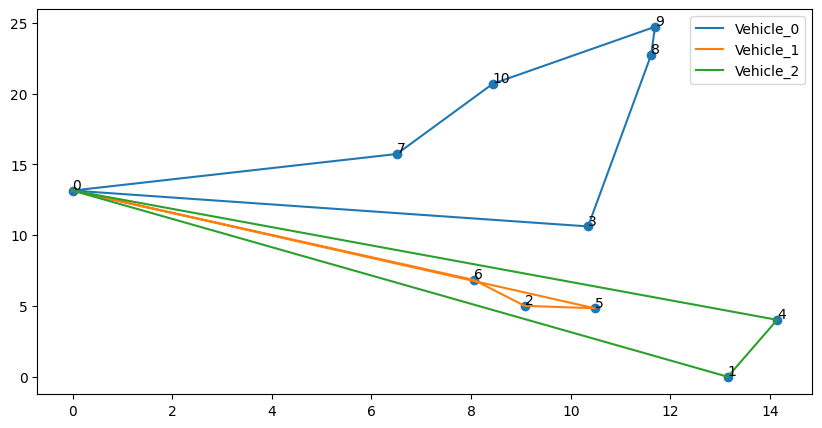

In [11]:
################################################
# Plotting the optimal path
################################################

# Plotting the points
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(df)):
    ax.annotate(str(i), xy=(distance_matrix[i,0], distance_matrix[i,1]+0.1))

ax.scatter(distance_matrix[:,0],distance_matrix[:,1])

for i in path.keys():
    ax.plot(distance_matrix[path[i],0], distance_matrix[path[i],1], label = i)
    ax.legend(loc='best')

# **Solution for vehicle Type B with capacity 30**

In [12]:
price_perkm = 1.5
routes, total_capacity  = nearest_neighbor(distance_matrix, demands, vehicle_capacity[1])

sum = 0
for j in range(len(routes)):
  route = routes [0]
  for i in range(len(route)-1):
    b = distance_matrix[route[i]][route[i+1]]
    sum+=b
print("Total distance :", sum)
print("Route", routes)
print("Cost : RM ", sum*price_perkm)
print("Total capacity each route ", total_capacity)

Total distance : 134.01173777992528
Route [[0, 7, 10, 9, 8, 3, 1, 0], [0, 6, 2, 5, 4, 0]]
Cost : RM  201.01760666988793
Total capacity each route  [30, 27]


In [13]:
## path for each vehicle
path = {}
for i in range(len(routes)):
  path['Vehicle_'+str(i)] = routes[i]

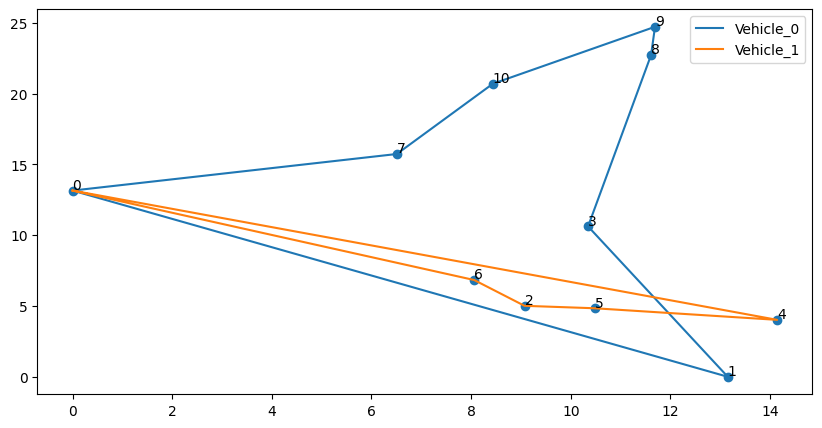

In [14]:
################################################
# Plotting the optimal path
################################################

# Plotting the points
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(df)):
    ax.annotate(str(i), xy=(distance_matrix[i,0], distance_matrix[i,1]+0.1))

ax.scatter(distance_matrix[:,0],distance_matrix[:,1])

for i in path.keys():
    ax.plot(distance_matrix[path[i],0], distance_matrix[path[i],1], label = i)
    ax.legend(loc='best')